['', 'trial', 'val_basic', 'delay', 'val_prc', 'response', 'RT', 'respSide', 'sideNOW', 'Version', 'loopID', 'Context']


Mean ELBO 3379.34: 100%|█████████████████████████████████████████| 400/400 [00:02<00:00, 196.10it/s]


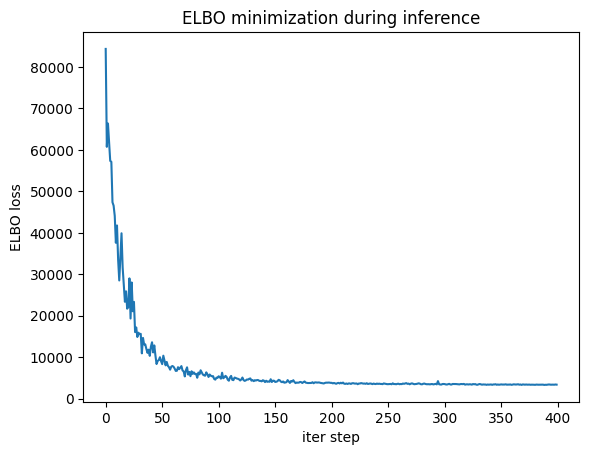

mean_u_mean_q tensor([ 3.7413,  1.8896,  1.6734,  1.7690,  2.1200,  2.9912, -0.0779,  5.2928,
         0.2687,  2.1983,  0.6703,  3.9678,  0.8880,  2.1888,  1.6662,  2.2377,
         5.5510,  3.4288,  1.6015, -0.0312,  2.8664,  0.5611,  0.3412,  1.7061,
         1.1907,  0.6836,  2.2326,  2.5833,  1.1686,  1.9857,  2.0113,  0.6043,
         0.8212,  2.5954,  3.0248,  4.7464,  5.8453,  1.7325,  2.3905,  1.1934,
         0.5161,  6.5672,  1.4259,  0.3415,  1.9701,  5.5726,  1.4073,  1.1297,
         1.7278,  1.5797,  4.3581,  1.4258,  2.5832,  4.4546,  3.4363,  1.5014,
         1.7243,  1.7940,  5.0142,  3.5487], requires_grad=True)
mean_u_sigma_q tensor([0.4615, 0.3894, 0.4597, 0.5800, 0.3648, 0.4696, 4.3228, 0.3838, 1.0109,
        0.4236, 0.3372, 0.9917, 1.0919, 3.1744, 0.8713, 1.3922, 0.6305, 0.2153,
        0.4330, 0.5347, 0.4097, 0.2246, 0.5716, 0.5341, 2.2331, 1.3680, 1.4208,
        0.4452, 0.2416, 0.7748, 0.3573, 0.5520, 0.5588, 0.3710, 0.3363, 1.0428,
        0.4712, 0.4440, 0.

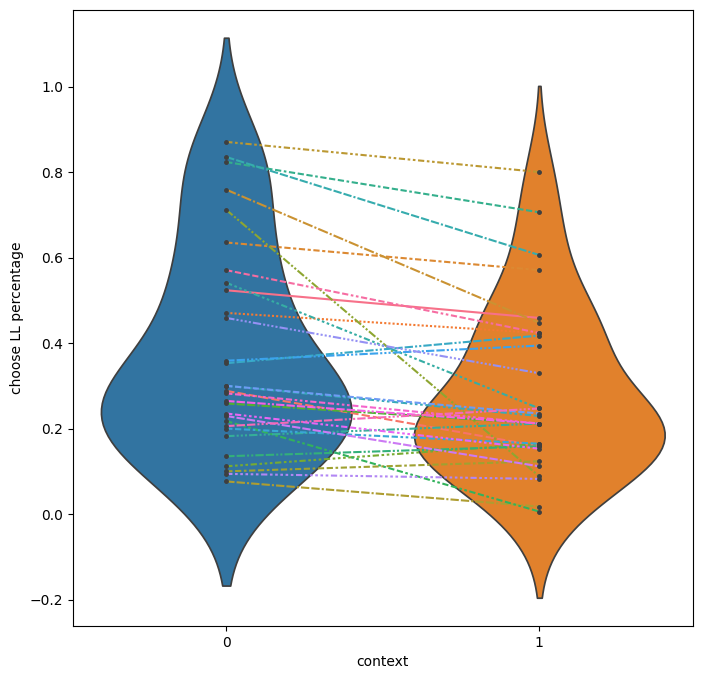

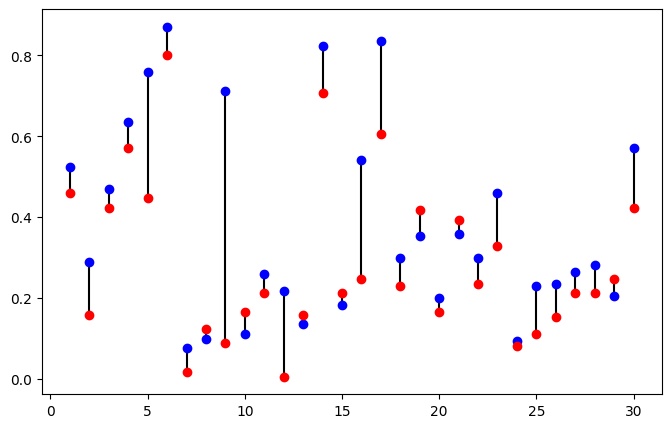

In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 12 2024

@author: Yaning
Data from Ben
Data file name: intertemporal_choice_dataset_all_trials.csv
"""
# run svi in this file
# get the real percentage of the participants
%run Documents/pyro_models/files_to_run/multiply_SVI_real_data_hierarchical.ipynb
%run Documents/pyro_models/files_to_run/percentage_comparison.ipynb

import math
import os
# from turtle import position
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.distributions import Beta, Binomial, HalfCauchy, Normal, Pareto, Uniform, Bernoulli, Categorical, Gamma
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean 
# import pandas as pd
import numpy as np
import scipy.stats as stats 


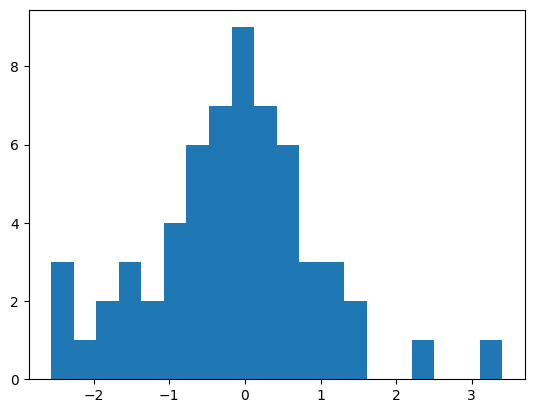

In [14]:
# have a look of the distribution of one parameter among all people
plt.hist(posterior["sigma_es_mean_q"].tolist(), bins=20)
plt.show()

In [69]:
inferred = np.exp(posterior["sigma_es_mean_q"].reshape([2,30]).tolist())

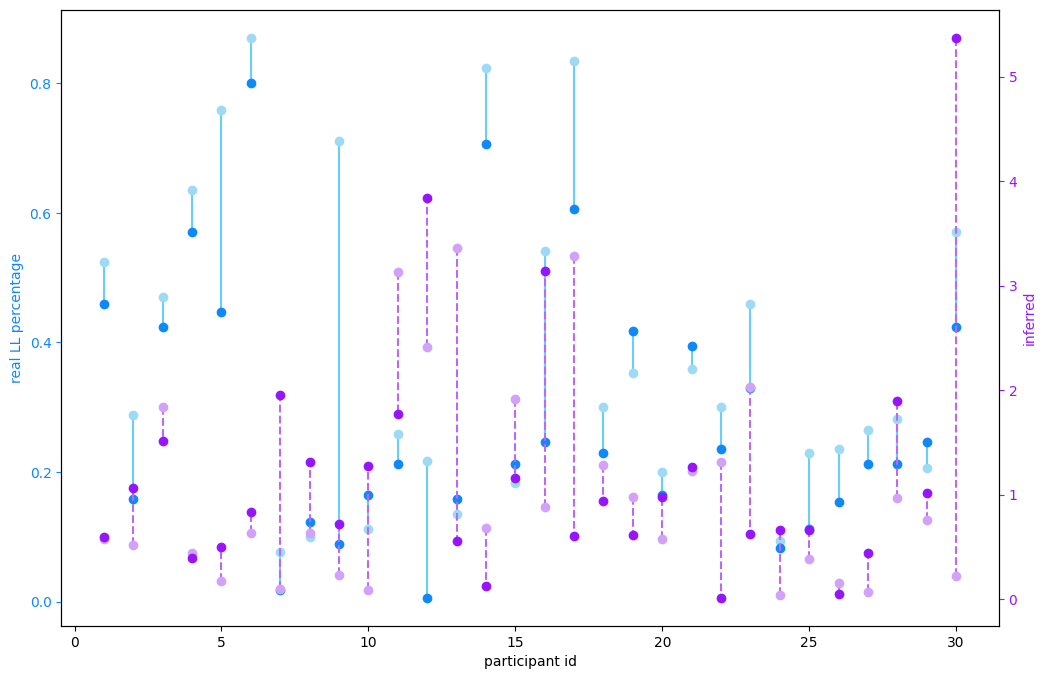

In [70]:
# plot real percentage and infered parameters together
fig, ax = plt.subplots(figsize=(15,8))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# plot the real percentage
for i in range(len(line_data)):
    x = [i+1, i+1]
    y = [line_data[i][0], line_data[i][1]]
    axes[0].plot(x, y, color="#67cefd", ls = '-')
    axes[0].plot(i+1, y[0], color ="#9edaf5", marker = "o")
    axes[0].plot(i+1, y[1], color = "#0f88fa", marker = "o")
axes[0].set_ylabel("real LL percentage", color = "#0f88fa")
axes[0].tick_params(axis='y', colors = "#0f88fa")
axes[0].set_xlabel("participant id")


for i in range(len(inferred[0])):
    x = [i+1, i+1]
    y_inferred = [inferred[0][i], inferred[1][i]]
    axes[1].plot(x, y_inferred, color="#b968fa", ls = "--")
    axes[1].plot(i+1, y_inferred[0], color = "#d2a2f8", marker = "o")
    axes[1].plot(i+1, y_inferred[1], color = "#9715fc", marker = "o")
axes[1].set_ylabel("inferred", color = "#9715fc")
axes[1].tick_params(axis='y', colors = "#9715fc")



plt.show()